In [1]:
import pandas as pd
import numpy as np
import geopandas as gpd

import matplotlib.pyplot as plt

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


In [2]:
BICYCLE = 15
SCOOTER = 21
E_BICYCLE = 23

micro_m = [SCOOTER, E_BICYCLE, BICYCLE]

In [3]:
involved_markers_heb_ta = pd.read_csv('./csv_tables/involved_markers_heb_ta.csv')
involved_markers_heb_ta['accident_date'] = pd.to_datetime(involved_markers_heb_ta['accident_date'])
involved_markers_heb_ta

C:\Users\itay8\AppData\Local\Temp\ipykernel_11176\4074794966.py:1: DtypeWarning: Columns (44,151) have mixed types. Specify dtype option on import or set low_memory=False.
  involved_markers_heb_ta = pd.read_csv('./csv_tables/involved_markers_heb_ta.csv')


,accident_id,provider_and_id,provider_code,file_type_police,involved_type,involved_type_hebrew,license_acquiring_date,age_group,age_group_hebrew,sex,...,vehicle_status,vehicle_status_hebrew,vehicle_attribution,vehicle_attribution_hebrew,seats,total_weight,total_weight_hebrew,vehicle_damage,vehicle_damage_hebrew,accident_date
0,2013001938,12013001938,1,1,1,נהג,1996,8,35-39,1.0,...,0.0,NaN,1.0,ישראלי,99.0,1.0,עד 1.9,1.0,קל,2013-07-31 02:00:00
1,2013001938,12013001938,1,1,3,נפגע,0,5,20-24,1.0,...,0.0,NaN,1.0,ישראלי,99.0,1.0,עד 1.9,1.0,קל,2013-07-31 02:00:00
2,2013002190,12013002190,1,1,1,נהג,0,99,לא ידוע,0.0,...,0.0,NaN,0.0,לא מנועי,99.0,0.0,לא ידוע,4.0,אין נזק,2013-03-14 02:30:00
3,2013002190,12013002190,1,1,1,נהג,0,99,לא ידוע,0.0,...,0.0,NaN,1.0,ישראלי,3.0,1.0,עד 1.9,4.0,אין נזק,2013-03-14 02:30:00
4,2023065778,32023065778,3,3,1,נהג,0,99,לא ידוע,0.0,...,0.0,NaN,1.0,ישראלי,3.0,2.0,2.0-2.9,4.0,אין נזק,2023-01-05 14:15:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103058,2023093433,32023093433,3,3,2,נהג נפגע,0,99,לא ידוע,0.0,...,0.0,NaN,1.0,ישראלי,99.0,0.0,לא ידוע,4.0,אין נזק,2023-02-14 08:30:00
103059,2023099292,32023099292,3,3,1,נהג,2001,9,40-44,2.0,...,0.0,NaN,1.0,ישראלי,3.0,1.0,עד 1.9,4.0,אין נזק,2023-02-23 17:00:00
103060,2023092779,32023092779,3,3,1,נהג,0,99,לא ידוע,0.0,...,0.0,NaN,1.0,ישראלי,99.0,0.0,לא ידוע,1.0,קל,2023-01-24 23:15:00
103061,2023090298,32023090298,3,3,2,נהג נפגע,1995,10,45-49,2.0,...,0.0,NaN,1.0,ישראלי,3.0,1.0,עד 1.9,1.0,קל,2023-01-01 16:00:00


In [56]:
# Load from Parquet
accidents_bp_distance = gpd.read_parquet('./csv_tables/accidents_bp_distance.parquet')
accidents_bp_distance.set_geometry('geometry', inplace=True)


accidents_bp_distance

,accident_id,provider_and_id,provider_code,file_type_police,involved_type,involved_type_hebrew,license_acquiring_date,age_group,age_group_hebrew,sex,...,vehicle_damage,vehicle_damage_hebrew,accident_date,geometry,poly_geo,distance,index_right,oid_shvil,street_name,shemmikta
15,2013001368,32013001368,3,3,2,נהג נפגע,0,6,25-29,1.0,...,4.0,אין נזק,2013-07-27 01:00:00,POINT (34.77509 32.07349),"LINESTRING (34.77549 32.07393, 34.77547 32.073...",61.478089,461,251,בוגרשוב,בוגרשוב משדרות בן ציון עד הירקון
5747,2013023048,32013023048,3,3,2,נהג נפגע,0,15,70-74,1.0,...,1.0,קל,2013-02-17 12:00:00,POINT (34.77509 32.07349),"LINESTRING (34.77549 32.07393, 34.77547 32.073...",61.478089,461,251,בוגרשוב,בוגרשוב משדרות בן ציון עד הירקון
8244,2013038829,32013038829,3,3,2,נהג נפגע,0,6,25-29,1.0,...,4.0,אין נזק,2013-11-11 15:45:00,POINT (34.77509 32.07349),"LINESTRING (34.77549 32.07393, 34.77547 32.073...",61.478089,461,251,בוגרשוב,בוגרשוב משדרות בן ציון עד הירקון
8673,2013040288,32013040288,3,3,2,נהג נפגע,0,6,25-29,1.0,...,4.0,אין נזק,2013-10-03 16:00:00,POINT (34.77509 32.07349),"LINESTRING (34.77549 32.07393, 34.77547 32.073...",61.478089,461,251,בוגרשוב,בוגרשוב משדרות בן ציון עד הירקון
11245,2013055718,32013055718,3,3,2,נהג נפגע,0,6,25-29,1.0,...,4.0,אין נזק,2013-10-24 20:00:00,POINT (34.77509 32.07349),"LINESTRING (34.77549 32.07393, 34.77547 32.073...",61.478089,461,251,בוגרשוב,בוגרשוב משדרות בן ציון עד הירקון
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98648,2022056027,32022056027,3,3,2,נהג נפגע,0,4,15-19,1.0,...,4.0,אין נזק,2022-07-12 15:15:00,POINT (34.80446 32.04379),"LINESTRING (34.80448 32.04419, 34.80450 32.044...",4.733599,424,235,בירנית,בירנית
100045,2022075296,32022075296,3,3,2,נהג נפגע,1978,13,60-64,1.0,...,4.0,אין נזק,2022-08-24 15:30:00,POINT (34.78693 32.10973),"LINESTRING (34.78538 32.10908, 34.78532 32.109...",160.721488,824,424,,None
100608,2022084995,32022084995,3,3,1,נהג,0,8,35-39,1.0,...,4.0,אין נזק,2022-03-06 09:15:00,POINT (34.76373 32.04880),"LINESTRING (34.76373 32.04872, 34.76378 32.04879)",4.449177,332,190,היינריך היינה,היינריך היינה מבן צבי עד גרוסמן יאיר מסלול מזרחי
101508,2022098483,32022098483,3,3,2,נהג נפגע,1989,11,50-54,1.0,...,4.0,אין נזק,2022-07-15 09:00:00,POINT (34.78475 32.12159),"LINESTRING (34.78226 32.11932, 34.78230 32.119...",139.252977,295,174,שביל הטיילת הצפונית,שביל הטיילת הצפונית מארצי יצחק עד הפארק הירקון


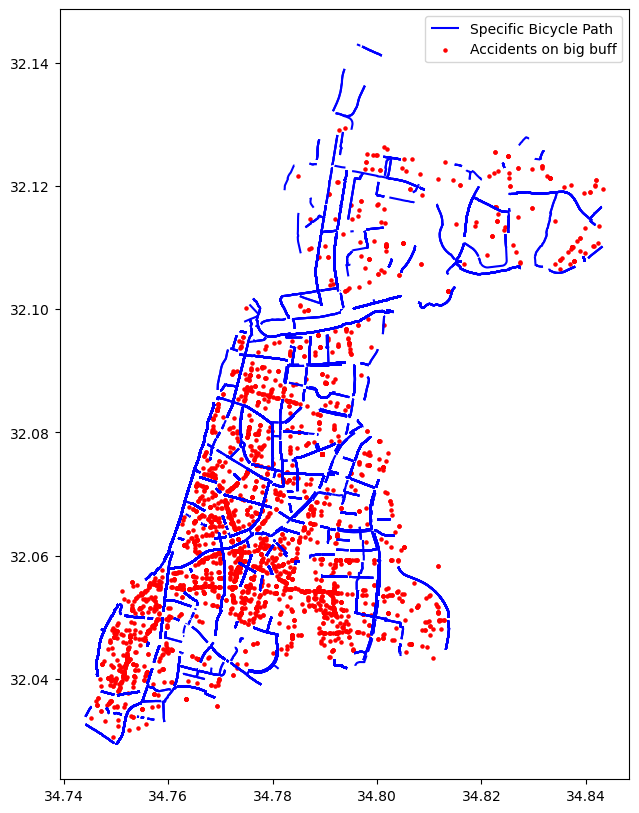

In [58]:
## Plotting Accidents for outside of buff

import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 10))

# BP
# bicycle_paths_big_overlap.plot(ax=ax, color='blue', label='Specific Bicycle Path')
accidents_bp_distance['poly_geo'].plot(ax=ax, color='blue', label='Specific Bicycle Path')
accidents_bp_distance[accidents_bp_distance['distance'] > 60].plot(ax=ax, color='red', marker='o', label='Accidents on big buff', markersize=5 )

plt.legend()
plt.show()

For recap later on:
* accidents_bp_distance has a poly_geo that is set as the geometry and a ['geometry'] column, when loading I need to set the geometry to ['geometry'] 

In [ ]:
python3 -c "from johnsnowlabs import *;nlp.install(ocr_secret='5.1.2-cafb3985abb5bdfefbbb5238781222b17770810a', enterprise_nlp_secret='5.2.1-ffc2b401994dc1c54ff36dc6e6557a8763900a80',hardware_platform='cpu', aws_key_id=' ', aws_access_key=' ', visual=True, browser_login=False, refresh_install=True)"